<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование рынка заведений общественного питания Москвы

Инвестор решил открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Инвесторов интересует текущее положение дел на рынке — сможет ли кафе снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Иточником информации для анализа являются открытые данные о заведениях общественного питания в Москве.
Необходимо сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. 
Оценить возможность развития сети.

## Загрузка данных

Импортируем библиотеки:

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Прочитаем файл rest_data.csv из папки /datasets и сохраним его в переменной df. Выведем на экран первые 5 строк таблицы:

In [60]:
df = pd.read_csv('/datasets/rest_data.csv')
display(df.head())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Изучим общую информацию о таблице:

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В анализируемой таблице 6 столбцов, согласно документации к данным:
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

Количество значений в столбцах совпадает, следовательно, в данных нет пропущенных значений.

Посчитаем количество явных дубликатов в таблице:

In [62]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


Явные дубликаты в таблице отсутствуют.

Более подробно изучим данные в столбцах:

In [63]:
for column in list(df.columns):  #  используем цикл по столбцам
    display(pd.DataFrame(df[column].value_counts().head(5)))

,id
151635,1
165512,1
183131,1
186224,1
180669,1


,object_name
Столовая,267
Кафе,236
Шаурма,234
KFC,155
Шоколадница,142


,chain
нет,12398
да,2968


,object_type
кафе,6099
столовая,2587
ресторан,2285
предприятие быстрого обслуживания,1923
бар,856


,address
"город Москва, Ходынский бульвар, дом 4",95
"город Москва, Пресненская набережная, дом 2",63
"город Москва, проспект Мира, дом 211, корпус 2",60
"город Москва, Кировоградская улица, дом 13А",53
"город Москва, площадь Киевского Вокзала, дом 2",48


,number
0,1621
40,835
20,727
30,685
10,644


**Вывод**: значения в столбцах соответствуют их описанию, пропуски и дубликаты отсутствуют. 

## Исследовательский анализ данных
Проанализируем соотношение видов объектов общественного питания по количеству:

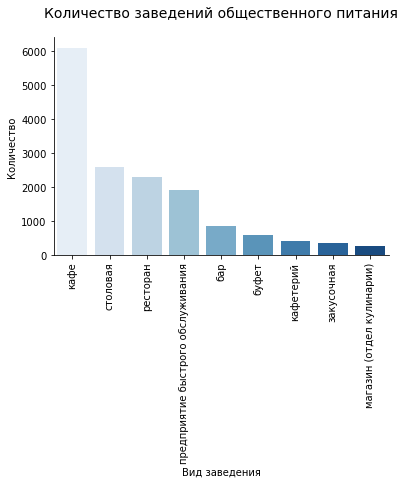

In [64]:
sns.countplot(x='object_type', data=df, order = df['object_type'].value_counts().index, palette='Blues') 
plt.xlabel('Вид заведения')
plt.ylabel('Количество')
plt.xticks(x='object_type', rotation='vertical')
plt.title('Количество заведений общественного питания', fontsize=14, pad=20)
sns.despine()

В анализируемой выборке больше всего заведений, относящихся к типу кафе, а меньше всего отделов кулинарии в магазинах.

Проанализируем соотношение сетевых и несетевых заведений по количеству:

Доля сетевых заведений составляет: 19.3%


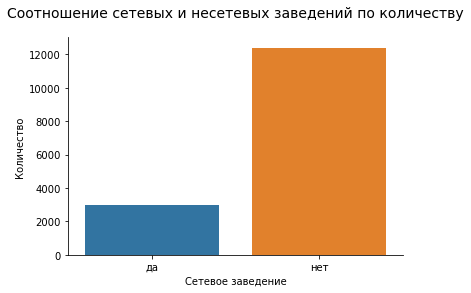

In [65]:
sns.countplot(x='chain', data=df, order = df['chain'].value_counts().sort_values(ascending=True).index) 

plt.xlabel('Сетевое заведение')
plt.ylabel('Количество')
plt.title('Соотношение сетевых и несетевых заведений по количеству', fontsize=14, pad=20)
sns.despine() 

df['chain_bool'] = df['chain'].map(dict(да=1, нет=0))
df['chain_bool'] = df['chain_bool'].astype(bool)
print('Доля сетевых заведений составляет: {:.1%}'.format(df['chain_bool'].mean()))

Сетевых заведений меньше, их доля составляет лишь 19.3%.

Рассмотрим детальнее долю сетевых заведений в разбивке по видам:

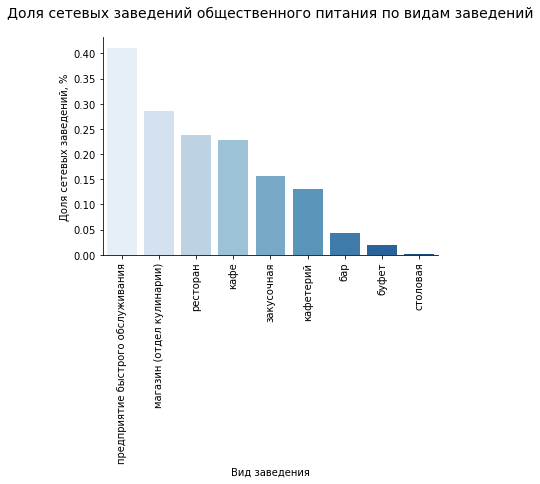

In [66]:
report = pd.DataFrame(df.pivot_table(index='object_type', values='chain_bool', aggfunc='mean').sort_values(
    by='chain_bool', ascending=False)
.reset_index().rename(columns={'object_type':'Вид заведения','chain_bool':'Доля сетевых заведений, %'}))

sns.barplot(x='Вид заведения', y='Доля сетевых заведений, %', data=report, palette='Blues') 
plt.xticks(x='object_type', rotation='vertical')
plt.title('Доля сетевых заведений общественного питания по видам заведений', fontsize=14, pad=20)
sns.despine()

Наибольшая доля сетевых заведений приходится на предприятия быстрого обслуживания (более 40%), а наименьшая на столовые (около 1%).

Проанализируем распределение числа посадочных мест в сетевых заведениях: 

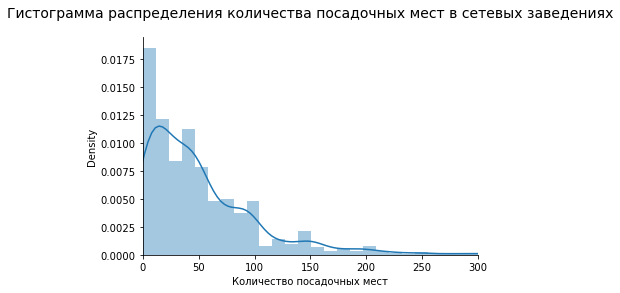

In [67]:
report = df[df['chain'] == 'да']
ax = sns.distplot(report['number'])
ax.set_xlim([0, 300])
plt.xlabel('Количество посадочных мест')
plt.title('Гистограмма распределения количества посадочных мест в сетевых заведениях', fontsize=14, pad=20)
sns.despine()

Из гистограммы видно, что для сетевых заведений характерно малое число посадочных мест.

Посчитаем среднее количество посадочных мест для каждого вида заведений:

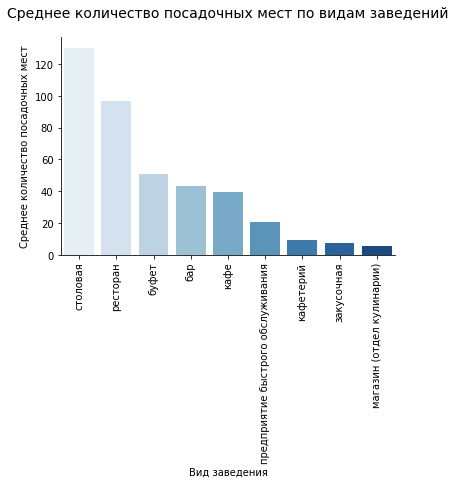

In [68]:
order = df.groupby(['object_type'])['number'].mean().sort_values(ascending=False).index
sns.barplot(x='object_type', y='number', data=df, order=order, palette='Blues', ci=None) 

plt.xlabel('Вид заведения')
plt.ylabel('Среднее количество посадочных мест')
plt.xticks(x='object_type', rotation='vertical')
plt.title('Cреднее количество посадочных мест по видам заведений', fontsize=14, pad=20)
sns.despine() 

В среднем самое большое количество посадочных мест приходится на столовые.

Выделим в отдельный столбец информацию об улице из столбца `address`, а также обогатим таблицу внешними данными по районам и округам:

In [69]:
pattern = '\,(([а-яА-Я0-9\-ёй\s"]+)?(улица|переулок|шоссе)([а-яА-Я0-9\-ёй\s"]+)?)\,'
df['street'] = df['address'].str.extract(pat = pattern)[0]

spreadsheet_id = '1aBr0H62DX7C3769DwIn-uNqs9nHSBUtGEcR9PXGmffQ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow_streets = pd.read_csv(BytesIO(r.content))
moscow_streets.columns = ['street', 'areaid', 'okrug', 'area']

df['street'] = df['street'].str.strip()
moscow_streets['street'] = moscow_streets['street'].str.strip()
df = df.merge(moscow_streets, on='street', how='left')

Построим график для ТОП-10 улиц по количеству объектов общественного питания:

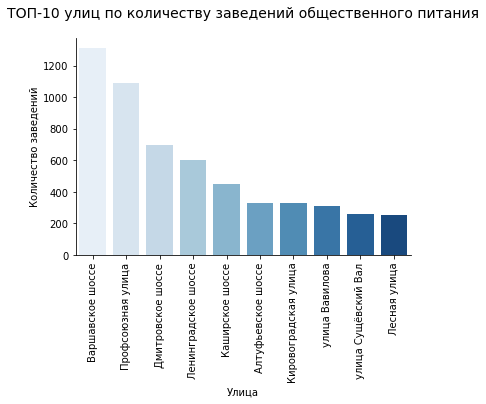

In [70]:
report = pd.DataFrame(df.pivot_table(index='street', values='id', aggfunc='count').sort_values(by='id', ascending=False)
.reset_index().rename(columns={'street':'Улица','id':'Количество заведений'})).head(10)

sns.barplot(x='Улица', y='Количество заведений', data=report, estimator=sum, palette='Blues') 
plt.xticks(x='Улица', rotation='vertical')
plt.title('ТОП-10 улиц по количеству заведений общественного питания', fontsize=14, pad=20)
sns.despine()

In [71]:
report = pd.DataFrame(df.pivot_table(index='street', values='id', aggfunc='count').sort_values(by='id', ascending=False)
.reset_index().rename(columns={'street':'Улица','id':'Количество заведений'})).head(10)

top_streets_list = report['Улица']
report = df.query('street in @top_streets_list')  # формируем срез по вхождению в список
display(pd.DataFrame(report.groupby(['okrug', 'street']).size().sort_values(ascending=False)).reset_index()
        .rename(columns={'street':'Улица','okrug':'Округ',0:'Количество'}))

display(pd.DataFrame(report['okrug'].value_counts().reset_index().rename(columns={'index':'Округ', 'okrug':'Количество'})))

,Округ,Улица,Количество
0,ЮЗАО,Профсоюзная улица,1092
1,ЮАО,Варшавское шоссе,984
2,САО,Дмитровское шоссе,500
3,САО,Ленинградское шоссе,500
4,ЮАО,Каширское шоссе,448
5,СВАО,Алтуфьевское шоссе,332
6,ЮАО,Кировоградская улица,330
7,ЮЗАО,Варшавское шоссе,328
8,ЮЗАО,улица Вавилова,234
9,СВАО,Дмитровское шоссе,200


,Округ,Количество
0,ЮАО,1840
1,ЮЗАО,1654
2,САО,1000
3,СВАО,618
4,ЦАО,236
5,Зеленоград,228
6,ЗАО,64


Значительная часть адресов приходится на ЮАО и ЮЗАО, также много адресов относятся к шоссе, что скорее всего связано с их протяженностью.

Найдем число улиц с одним объектом общественного питания:

In [72]:
report = pd.DataFrame(df.pivot_table(index='street', values='id', aggfunc='count').sort_values(by='id')
.reset_index().rename(columns={'street':'Улица','id':'Количество заведений'}))
report = report[report['Количество заведений'] == 1].head(10)
display(report)

,Улица,Количество заведений
0,1-й Балтийский переулок,1
1,Норильская улица,1
2,Новосибирская улица,1
3,Новорублёвская улица,1
4,Новопресненский переулок,1
5,Новоостаповская улица,1
6,Новолучанская улица,1
7,Никитский переулок,1
8,Нижний Кисельный переулок,1
9,Несвижский переулок,1


In [73]:
bottom_streets_list = report['Улица']
report = df.query('street in @bottom_streets_list')  # формируем срез по вхождению в список
display(pd.DataFrame(report.groupby(['okrug', 'street']).size().sort_values(ascending=False)).reset_index()
        .rename(columns={'street':'Улица','okrug':'Округ',0:'Количество'}))

display(pd.DataFrame(report['okrug'].value_counts().reset_index().rename(columns={'index':'Округ', 'okrug':'Количество'})))

,Округ,Улица,Количество
0,ВАО,Новосибирская улица,1
1,ЗАО,Новолучанская улица,1
2,ЗАО,Новорублёвская улица,1
3,САО,1-й Балтийский переулок,1
4,СВАО,Норильская улица,1
5,ЦАО,Несвижский переулок,1
6,ЦАО,Нижний Кисельный переулок,1
7,ЦАО,Никитский переулок,1
8,ЦАО,Новопресненский переулок,1
9,ЮВАО,Новоостаповская улица,1


,Округ,Количество
0,ЦАО,4
1,ЗАО,2
2,САО,1
3,ВАО,1
4,СВАО,1
5,ЮВАО,1


Значительная часть данных адресов приходится на ЦАО.

Изучим распределение количества посадочных мест для улиц с большим количеством объектов общественного питания:

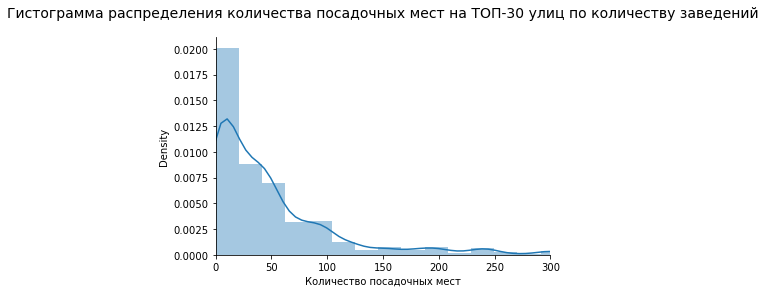

In [74]:
report = pd.DataFrame(df.pivot_table(index='street', values='id', aggfunc='count').sort_values(by='id', ascending=False)
.reset_index().rename(columns={'street':'Улица','id':'Количество заведений'})).head(30)

top_30_list = report['Улица']  # список топ-30 улиц
report = df.query('street in @top_30_list')  # формируем срез по вхождению в список

ax = sns.distplot(report['number'])
ax.set_xlim([0, 300])
plt.xlabel('Количество посадочных мест')
plt.title('Гистограмма распределения количества посадочных мест на ТОП-30 улиц по количеству заведений', fontsize=14, pad=20)
sns.despine()

Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания в целом соответветствует распределению посадочных мест в сетевых заведениях. Для данных заведений также характерно малое число посадочных мест.

## Общий вывод

В данном исследовании был проанализирован массив данных о заведениях общественного питания Москвы. В процессе предобработки данные были валидированы и проверены на наличие ошибок и артефактов. В ходе исследования были рассчитаны показатели, характеризующие заведения общественного питания, изучены закономерности распределения значений. В процессе анализа данных было установлено, что: 
- В Москве больше всего заведений, относящихся к типу кафе, а меньше всего отделов кулинарии в магазинах
- Доля сетевых заведений составляет 19.3%
- Наибольшая доля сетевых заведений приходится на предприятия быстрого обслуживания (более 40%), а наименьшая на столовые (около 1%) 
- Для сетевых заведений характерно малое число посадочных мест
- В среднем самое большое количество посадочных мест приходится на столовые
- Самая высокая плотность заведений общественного питания на 1 улицу наблюдается на юге Москвы (ЮАО и ЮЗАО), а наименьшая в ЦАО
- Для заведений на улицах с большим количеством объектов общественного питания характерно малое число посадочных мест

Роботизация кафе целесообразна при большом количестве посадочных мест и посетителей за счет эффекта масштаба, но как показал анализ данных, большая часть действующих заведений располагает малым количеством посадочных мест. Сама концпепция роботизированного кафе не предполагает массового потока клиентов по примеру столовых и способна привлечь клиентов за счет «вау-эффекта». Есть существенный риск снижения интереса к такому заведению со временем. Принимая во внимания вышесказанное, инициатива является высокорискованной.